In [1]:
# Import library pandas, numpy dan baca dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nsfg = pd.read_hdf('nsfg.hdf5','nsfg')
type(nsfg)

pandas.core.frame.DataFrame

In [2]:
# Melihat ukuran data
nsfg.shape

(9358, 10)

In [3]:
# Melihat 5 data teratas
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [4]:
# Melihat 5 data terbawah
nsfg.tail()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
9353,70615,1,4.0,11.0,35,1.0,1758,1825.0,22.0,8117.554461
9354,70616,1,8.0,7.0,42,1.0,1741,1816.0,18.0,6842.240477
9355,70616,1,7.0,6.0,36,1.0,2091,2158.0,23.0,6842.240477
9356,70619,1,8.0,3.0,41,1.0,3450,3525.0,31.0,3856.253532
9357,70619,1,8.0,5.0,40,1.0,3683,3758.0,34.0,3856.253532


In [5]:
# Melihat nama kolom
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [6]:
# Memilih kolom birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

In [7]:
ounces

0        4.0
1       12.0
2        4.0
3        NaN
4       13.0
        ... 
9353    11.0
9354     7.0
9355     6.0
9356     3.0
9357     5.0
Name: birthwgt_oz1, Length: 9358, dtype: float64

In [8]:
type(ounces)

pandas.core.series.Series

In [9]:
ounces.head()

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

In [10]:
# Label outcomes
# value	label
# 1 Live birth
# 2 Induced abortion
# 3 Stillbirth
# 4 Miscarriage
# 5 Ectopic pregnancy
# 6 Current pregnancy

# Berapa banyak kelahiran yg hasilnya: Live birth?
nsfg['outcome'].value_counts()

1    6489
4    1469
2     947
6     249
5     118
3      86
Name: outcome, dtype: int64

In [11]:
# Membersihkan variabel 'nbrnaliv'
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [12]:
# Merubah value 8 menjadi NaN
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)

In [14]:
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

In [16]:
# Data usia kehamilan(awal s/d kelahiran)
agecon = nsfg['agecon']/100
agepreg = nsfg['agepreg']/100

In [17]:
# hitung selisih agecon - ageprep
preg_length = agepreg - agecon

In [18]:
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


In [20]:
nsfg['preglength'] = preg_length

In [21]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015,preglength
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843,0.75
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843,0.67
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843,0.67
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358,NaN
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914,0.75


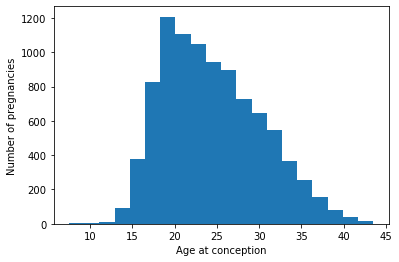

In [24]:
# Plot the histogram
plt.hist(agecon, 20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

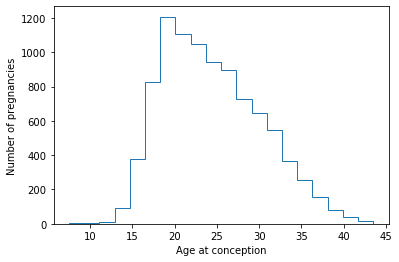

In [25]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

In [30]:
# membuat fungsi 
def resample_rows_weighted(df, column='finalwgt', seed=17):
    """Resamples a DataFrame using probabilities proportional to given column.

    df: DataFrame
    column: string column name to use as weights

    returns: DataFrame
    """
    np.random.seed(seed)
    weights = df[column] / sum(df[column])
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

In [31]:
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

In [32]:
# Membersihkan data dr kolom birthwgt_lb2 & birthwgt_oz1
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

In [33]:
# menghitung berat total
birth_weight = pounds + ounces/16

In [35]:
# Buat Series (boolean) 
full_term = nsfg['prglngth'] >= 37

In [36]:
full_term_weight = birth_weight[full_term]
print(full_term_weight.mean())

7.392597951914515


In [37]:
# Mancari lama kehamilan rata-rata pada bayi lahir
single = nsfg['nbrnaliv'] == 1

In [39]:
# Filter berat bayi dg kelahiran normal (lahir hidup)
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

Single full-term mean: 7.40297320308299


In [41]:
# Filter berat bayi dg kelahiran normal (all)
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Multiple full-term mean: 5.784722222222222
